
# **Sustitución por valores al final de la distribución**

En la sección anterior, sustituimos valores ausentes por valores constantes arbitrarios. Sin embargo, determinar el valor arbitrario es un proceso laborioso y manual. Este proceso se puede automatizar seleccionando un valor al final de la distribución.

### Cómo se seleccionan los valores al final de la distribución?

- Si la variable está normalmente distribuida, podemos usar el promedio más o menos 3 veces la desviación estándar.
- Si la variable está sesgada, podemos usar la regla de proximidad entre-cuantil, IQR

- Podemos también seleccionar el valor mínimo o máximo y multiplicarlo por factor, como 2 o 3.

### Cuáles variables podemos sustituir con valores arbitrarios?

Este método es apropiado para variables numéricas.


### Condiciones

- Los datos no faltan de forma aleatoria

Si este es el caso, queremos comunicar que estos valores nulos son diferentes al resto de la población y por lo tanto los reemplazamos con un valor arbitrario y no con la media/mediana que representan los valores más comunes.


### Ventajas

- Fácil de implementar
- Forma rápida de obtener conjuntos completos de datos
- Puede ser integrado en producción (durante el despliegue del modelo)
- Captura la importancia de la 'ausencia' (si existe)

### Limitaciones

- Distorsión de la distribución original de la variable
- Distorsión de la varianza original
- Distorsión de la covarianza con las otras variables en los datos.
- Esta técnica puede encubrir los valores extremos verdaderos que se encuentran al final de la distribución.

### Nota Final

Este método no es muy común en las competenticas de ciencia de datos, sin embargo es usado ampliamente en compañías financieras. Cuando se captura la historia financiera de clientes, para no asumir que los valores faltan aleatoriamente, los datos ausentes son reemplazados por un valor al final de la distribución.


## En este demo:

Vamos a aprender como sustituir valores nulos con valores arbitrarios utilizando pandas y los set de datos Ames House Price y Titanic.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
usecols=['age', 'fare', 'survived']
data=sns.load_dataset('titanic')
data=data[usecols]

In [ ]:
# Titanic Dataset con unas variables para el demo


data.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [ ]:
# porcentaje de NA o valores nulos

data.isnull().mean()

age         0.198653
fare        0.000000
survived    0.000000
dtype: float64

### Para tener en cuenta

Los parámetros para la sustitución o imputación de datos nulos se deben aprender utilizando el set de entrenamiento SOLAMENTE. Luego, estos parámetros se utilizaran para imputar los valores nulos en el set de prueba.

In [ ]:
# Separemos en segmentos para entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # variables independientes
    data['survived'],  # target
    test_size=0.3,  # porcentaje de obs en test set
    random_state=0)  # semilla para reproducibilidad

X_train.shape, X_test.shape

((623, 2), (268, 2))

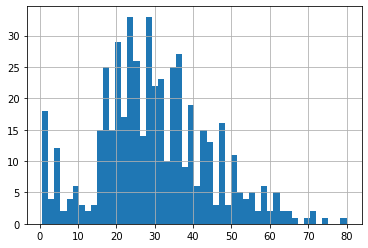

In [ ]:
# distribución de la variable age

X_train.age.hist(bins=50)

In [ ]:
# creemos una función para sustituir los valores faltantes
# con un valor determinado

# la función toma como argumentos:
# dataframe, variable, y el valor de arbitrario para la sustitución
# retorna la variable con los valores sustituidos

def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [ ]:
# extremo final de la distribución:

# Age parece tener distribución Gaussiana, usaremos
# el promedio y la desviación estándar para sustituir valores

X_train.age.mean() + 3 * X_train.age.std()

73.43632005918369

In [ ]:
# sustituir los NA con los valores calculados en la celda anterior

X_train['age_imputed'] = impute_na(X_train, 'age',
                                   X_train.age.mean() + 3 * X_train.age.std())

X_train.head(15)

,age,fare,age_imputed
857,51.0,26.5500,51.00000
52,49.0,76.7292,49.00000
386,1.0,46.9000,1.00000
124,54.0,77.2875,54.00000
578,NaN,14.4583,73.43632
549,8.0,36.7500,8.00000
118,24.0,247.5208,24.00000
12,20.0,8.0500,20.00000
157,30.0,8.0500,30.00000
127,24.0,7.1417,24.00000


Observa como las filas con valores nulos (NaN) in Age, fueron reemplazadas con el valor 73.43632005918366

In [ ]:
# podemos ver un cambio en la varianza tras la imputación

# esto es de esperarse, porque el porcentaje de valores ausentes
# es relativamente grande en age, ~20%


print('Varianza variable original: ', X_train['age'].var())
print('Varianza luego de sustitución por media mas 3*std: ', X_train['age_imputed'].var())

Varianza variable original:  210.45286924636747
Varianza luego de sustitución por media mas 3*std:  466.4111899213168


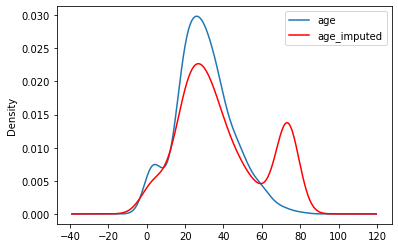

In [ ]:
# Comparemos distribuciones

# podemos ver que la distribución ha cambiado con más
# valores acumulados al final de la escala

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original de la variable
X_train['age'].plot(kind='kde', ax=ax)

# distribución variable sustituida con  media más 3*std
X_train['age_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Al igual que en la sustitución por valores arbitrarios, la sustitución por valores al final de la distribución distorsiona la distribución original de la variables y como es de esperarse, la variable transformada tiene más valores al extremo de la distribución.

**Es esto importante?**

Depende del algoritmo de machine learning seleccionado para construir el modelo.
Los modelos lineales asumen que las variables están normalmente distribuidas. La sustitución por valores arbitrarios puede distorsionar la distribución normal original si el porcentaje de valores ausentes es alto y por lo tanto afectar el desempeño del modelo lineal.


Por el contrario, esta técnica funciona muy bien para los algoritmos basados en árboles.

In [ ]:
# esta técnica también puede afectar la relación de la variable imputada
# con las restantes variables en el set de datos

# veamos para esto la covarianza

X_train[['fare', 'age', 'age_imputed']].cov()

,fare,age,age_imputed
fare,2328.801583,78.468894,-7.185565
age,78.468894,210.452869,210.452869
age_imputed,-7.185565,210.452869,466.411190


Se puede observar que la covarianza entre Age y Fare cambió luego de la sustitución

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


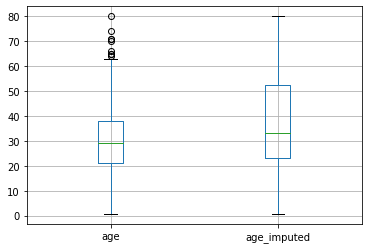

In [ ]:
# Finalmente, la sustitución puede afectar los valores extremos

# Gráfico de caja
X_train[['age', 'age_imputed']].boxplot()

Los valores extremos presentes en la variable original parecen haber desaparecido!!!!

## House Prices Dataset

Repitamos rápidamente el mismo ejercicio con el House Prices dataset; este tiene variables con pocos o muchos valores nulos, por lo tanto podemos comparar el efecto de la sustitución en ambos escenarios.

In [ ]:
# Vamos a usar las siguientes variables
# 3 de las cuales tienen valores nulos

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [ ]:
# House Prices dataset

data = pd.read_csv('https://raw.githubusercontent.com/RubixML/Housing/master/dataset.csv')
data=data[cols_to_use]
print(data.shape)
data.head()

(1460, 10)


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65,196,2003,208500
1,6,1262,1262,1262,298,284,80,0,1976,181500
2,7,920,920,1786,0,434,68,162,2001,223500
3,7,756,961,1717,0,540,60,0,1998,140000
4,8,1145,1145,2198,192,490,84,350,2000,250000


In [ ]:
# en la siguiente lista (list comprehension), vamos a iterar sobre
# las columnas en los datos y seleccionar aquellas con valores faltantes

[var for var in data.columns if data[var].isnull().sum()>0]

[]

In [ ]:
# porcentaje de valores nulos

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [ ]:
# separemos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

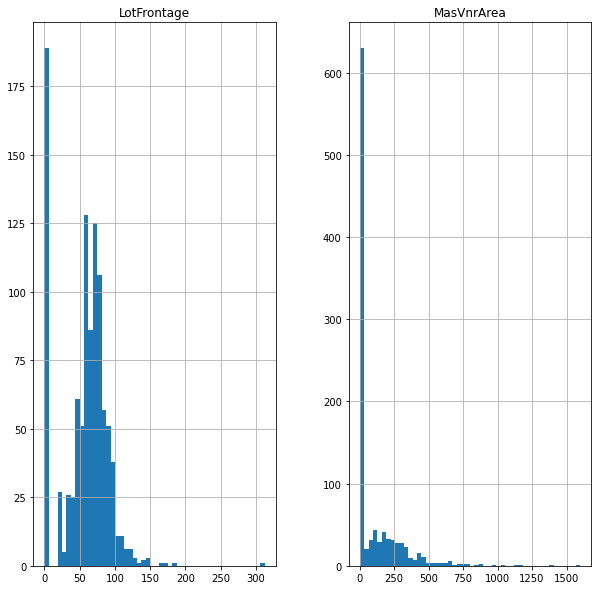

In [ ]:
# distribuciones de las variables

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
# las variables están normalmente distribuidas

# sustituyamos los valores nulos con la regla de proximidad del rango entre-cuantil
# como vimos en la clase de valores extremos en la sección 3

# rango entre-cuantil IQR

IQR = X_train['LotFrontage'].quantile(0.75) - X_train['LotFrontage'].quantile(
    0.25)

# límite superior
extreme_value = X_train['LotFrontage'].quantile(0.75) + 3 * IQR

extreme_value

193.0

In [ ]:
# sustituir valores nulos con los valores extremos

X_train.loc[:,'LotFrontage_imputed'] = impute_na(X_train, 'LotFrontage', extreme_value)
X_test.loc[:,'LotFrontage_imputed'] = impute_na(X_test, 'LotFrontage', extreme_value)

In [ ]:
# repitamos para la variable MasVnrArea

# rango entre-cuantil IQR
IQR = X_train['MasVnrArea'].quantile(0.75) - X_train['MasVnrArea'].quantile(
    0.25)

# límite superior
extreme_value = X_train['MasVnrArea'].quantile(0.75) + 3 * IQR

extreme_value

680.0

In [ ]:
# sustituir valores nulos con los valores extremos

X_train.loc[:,'MasVnrArea_imputed'] = impute_na(X_train, 'MasVnrArea', extreme_value)
X_test.loc[:,'MasVnrArea_imputed'] = impute_na(X_test, 'MasVnrArea', extreme_value)

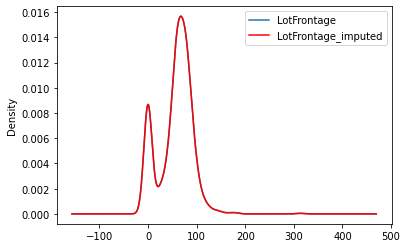

In [ ]:
# evaluemos el efecto de la sustitución en las distribuciones

# los valores de la variable imputada presentan una acumulación
# hacia el valor utilizado para reemplazar NA

fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable sustituida
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

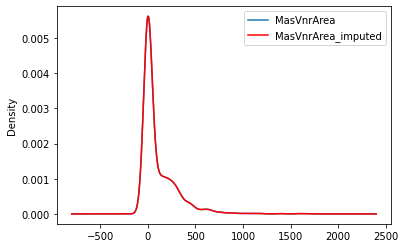

In [ ]:
# evaluemos el efecto de la sustitución en las distribuciones

# MasVnrArea tienen solo unos pocos valores nulos, por lo tanto
# el cambio en la distribución es menos dramático. Menos que cuando utilizamos
# el valor arbitrario es 2999 como vimos en el notebook anterior


fig = plt.figure()
ax = fig.add_subplot(111)

# distribución original
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable sustituida
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# etiquetas
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Podemos observar de las gráficas anteriores que la distribución de LotFrontAge cambió dramáticamente, a diferencia de MasVnrArea. Esto se debe a que el % de valores nulos en la segunda variable es pequeño.

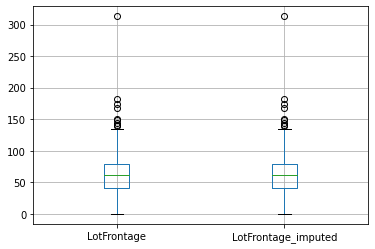

In [ ]:
# también vemos que hay menos valores extremos después de la sustitución

X_train[['LotFrontage', 'LotFrontage_imputed']].boxplot()

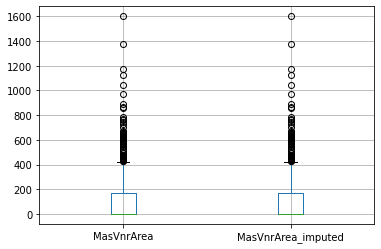

In [ ]:
# sin embargo, los valores extremos no se afectan para la variable
# MasVnrArea

X_train[['MasVnrArea', 'MasVnrArea_imputed']].boxplot()

In [ ]:
# Igualmente podemos ver el efecto de la sustitución
# en la varianza

# Para LotFrontAge hay un cambio significativo ya que el porcentaje
# de valores nulos es alto ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  1166.3258000770516
Variance after imputation:  1166.3258000770516


In [ ]:
# En MasnVnrArea, el cambio en la varianza no es considerable
# es importante resaltar que el efecto es mucho más pequeño
# que cuando se uso el valor 2999 para la sustitución de los valores nulos
# (compara con los resultados del notebook anterior)

print('Varianza original: ', X_train['MasVnrArea'].var())
print('Varianza despues de sustitución: ', X_train['MasVnrArea_imputed'].var())

Varianza original:  32874.27007404175
Varianza despues de sustitución:  32874.27007404175


In [ ]:
# Exploremos la covarianza:
# tómate el tiempo de comparar los valores en la tabla

X_train.cov()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
OverallQual,1.843859,2.886241e+02,2.242973e+02,4.091242e+02,3.168557e+01,1.746147e+02,7.140486,1.005330e+02,8.320132e+04,7.140486,1.005330e+02
TotalBsmtSF,288.624075,1.682931e+05,1.212079e+05,8.615192e+04,1.227966e+04,7.513307e+04,2426.609753,2.465436e+04,2.003928e+07,2426.609753,2.465436e+04
1stFlrSF,224.297266,1.212079e+05,1.398656e+05,1.044401e+05,1.109406e+04,4.987449e+04,2399.494481,2.080136e+04,1.783631e+07,2399.494481,2.080136e+04
GrLivArea,409.124216,8.615192e+04,1.044401e+05,2.681277e+05,1.558395e+04,5.203392e+04,2711.556662,3.496714e+04,2.934477e+07,2711.556662,3.496714e+04
WoodDeckSF,31.685571,1.227966e+04,1.109406e+04,1.558395e+04,1.648582e+04,-1.833201e+03,-285.075911,3.212101e+03,3.029981e+06,-285.075911,3.212101e+03
BsmtUnfSF,174.614725,7.513307e+04,4.987449e+04,5.203392e+04,-1.833201e+03,1.875241e+05,2256.661389,7.472110e+03,6.833028e+06,2256.661389,7.472110e+03
LotFrontage,7.140486,2.426610e+03,2.399494e+03,2.711557e+03,-2.850759e+02,2.256661e+03,1166.325800,4.734195e+02,5.147233e+05,1166.325800,4.734195e+02
MasVnrArea,100.533003,2.465436e+04,2.080136e+04,3.496714e+04,3.212101e+03,7.472110e+03,473.419523,3.287427e+04,6.790442e+06,473.419523,3.287427e+04
SalePrice,83201.317781,2.003928e+07,1.783631e+07,2.934477e+07,3.029981e+06,6.833028e+06,514723.295173,6.790442e+06,6.105731e+09,514723.295173,6.790442e+06
LotFrontage_imputed,7.140486,2.426610e+03,2.399494e+03,2.711557e+03,-2.850759e+02,2.256661e+03,1166.325800,4.734195e+02,5.147233e+05,1166.325800,4.734195e+02
